# CARD TRANSACTION FRAUD DETECTION MODEL

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd

In [2]:
# READING EXCEL DATA
rawdata=pd.read_csv("card_transdata.csv")

In [3]:
# WHICH TYPE OF DATA 
type(rawdata)

pandas.core.frame.DataFrame

In [4]:
#SHAPE OF DATA
rawdata.shape

(1000000, 8)

In [5]:
rawdata.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [6]:
rawdata.info()
rawdata.isna()# it shows any null value is present orn not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False


In [7]:
rawdata.fraud

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

In [8]:
featuredata=rawdata.drop("fraud",axis="columns")

In [9]:
featuredata

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [10]:
rawdata

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


# outlier detection and coorelation maps

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='online_order'>

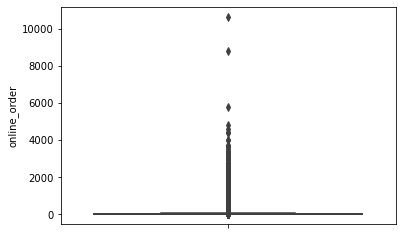

In [12]:
sns.boxplot(y=rawdata.distance_from_home)




sns.boxplot(y=rawdata.used_chip)
sns.boxplot(y=rawdata.used_pin_number)
sns.boxplot(y=rawdata.online_order)

In [13]:
y=rawdata.distance_from_home
y.describe()

count    1000000.000000
mean          26.628792
std           65.390784
min            0.004874
25%            3.878008
50%            9.967760
75%           25.743985
max        10632.723672
Name: distance_from_home, dtype: float64

(103631, 8)


<AxesSubplot:title={'center':'distance_from_home'}, ylabel='distance_from_home'>

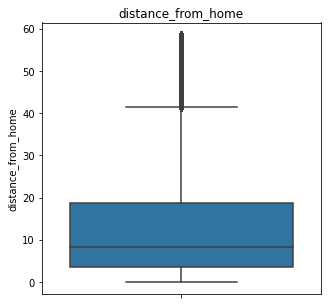

In [14]:
# removing outliers using formula of inter quantile range
Q1 = rawdata.distance_from_home.quantile(0.25)
Q3 = rawdata.distance_from_home.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
Data_outliers=rawdata[(rawdata.distance_from_home<lower_limit)|(rawdata.distance_from_home>upper_limit)]
print(Data_outliers.shape)
rawdata=rawdata[(rawdata.distance_from_home>lower_limit)&(rawdata.distance_from_home<upper_limit)]#dropping the outliers from dataset
plt.figure(figsize = (5, 5))
plt.title('distance_from_home')
sns.boxplot(y = rawdata.distance_from_home)

<AxesSubplot:ylabel='distance_from_last_transaction'>

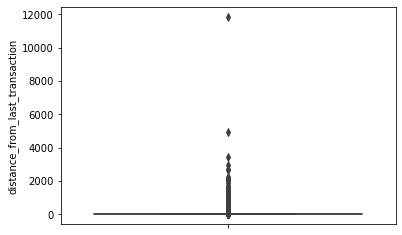

In [15]:
sns.boxplot(y=rawdata.distance_from_last_transaction)

(17059, 8)


<AxesSubplot:title={'center':'distance_from_last_transaction'}, ylabel='distance_from_last_transaction'>

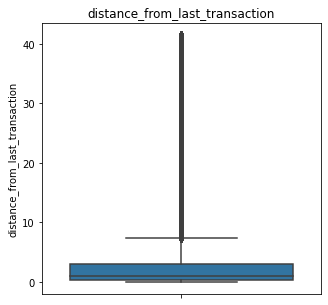

In [16]:
Q1 = rawdata.distance_from_home.quantile(0.25)
Q3 = rawdata.distance_from_home.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
Data_outliers=rawdata[(rawdata.distance_from_last_transaction<lower_limit)|(rawdata.distance_from_last_transaction>upper_limit)]
print(Data_outliers.shape)
rawdata=rawdata[(rawdata.distance_from_last_transaction>lower_limit)&(rawdata.distance_from_last_transaction<upper_limit)]#dropping the outliers from dataset
plt.figure(figsize = (5, 5))
plt.title('distance_from_last_transaction')
sns.boxplot(y = rawdata.distance_from_last_transaction)

count    879310.000000
mean          1.824046
std           2.811122
min           0.004399
25%           0.475991
50%           0.997278
75%           2.094662
max         267.802942
Name: ratio_to_median_purchase_price, dtype: float64

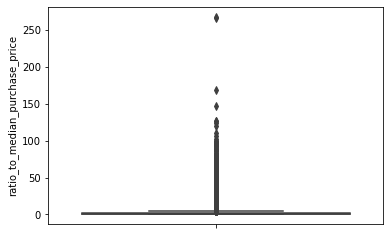

In [17]:
sns.boxplot(y=rawdata.ratio_to_median_purchase_price)
rawdata.ratio_to_median_purchase_price.describe()

(74253, 8)


<AxesSubplot:title={'center':'ratio_to_median_purchase_price'}, ylabel='ratio_to_median_purchase_price'>

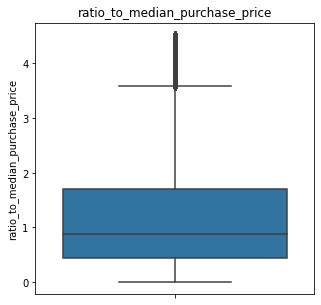

In [18]:
Q1 = rawdata.ratio_to_median_purchase_price.quantile(0.25)
Q3 = rawdata.ratio_to_median_purchase_price.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
Data_outliers=rawdata[(rawdata.ratio_to_median_purchase_price<lower_limit)|(rawdata.ratio_to_median_purchase_price>upper_limit)]
print(Data_outliers.shape)
rawdata=rawdata[(rawdata.ratio_to_median_purchase_price>lower_limit)&(rawdata.ratio_to_median_purchase_price<upper_limit)]#dropping the outliers from dataset
plt.figure(figsize = (5, 5))
plt.title('ratio_to_median_purchase_price')
sns.boxplot(y = rawdata.ratio_to_median_purchase_price)

In [19]:
rawdata
#here we got refreshed data after removing outliers ,and we got 194943 data removed as outliers.

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [20]:
rawdata.corr()
#here we observe as ratio of purchase increasing the chances of fraud happening is gets higher,
#similarly if uses of pin and chip increases fraud gets decreases . 

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.000388,0.000402,3.586454e-01,0.000542,0.000857,-1.773903e-03,-0.004839
distance_from_last_transaction,-0.000388,1.000000,-0.000160,-1.772946e-03,-0.000998,-0.000641,6.302759e-04,-0.000429
ratio_to_median_purchase_price,0.000402,-0.000160,1.000000,1.864488e-03,-0.000204,-0.000884,7.268316e-05,0.337194
repeat_retailer,0.358645,-0.001773,0.001864,1.000000e+00,-0.001618,0.000233,8.571657e-09,-0.010527
used_chip,0.000542,-0.000998,-0.000204,-1.617606e-03,1.000000,-0.001847,-2.112863e-04,-0.003427
used_pin_number,0.000857,-0.000641,-0.000884,2.327915e-04,-0.001847,1.000000,1.848729e-04,-0.037591
online_order,-0.001774,0.000630,0.000073,8.571657e-09,-0.000211,0.000185,1.000000e+00,0.072243
fraud,-0.004839,-0.000429,0.337194,-1.052749e-02,-0.003427,-0.037591,7.224254e-02,1.000000


# shaping data, model training and prediction

In [21]:
x=rawdata.drop(['fraud'],axis='columns')
x


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [22]:
y=rawdata.fraud

In [23]:
#preparing test and  train dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
#scaling our data using preprocessing method for better accuracy
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [25]:
#scaled train data
x_train

array([[-0.72146654,  0.46214804,  1.4503598 , ..., -0.73455891,
        -0.33396699, -1.36549865],
       [ 0.8339962 , -0.39703553,  2.77412718, ...,  1.3613612 ,
        -0.33396699, -1.36549865],
       [ 1.59193386, -0.19782881, -0.85645871, ..., -0.73455891,
        -0.33396699,  0.7323332 ],
       ...,
       [-0.33090359,  0.73942364,  0.33219956, ..., -0.73455891,
        -0.33396699,  0.7323332 ],
       [-0.32545321,  0.58721815, -0.92049301, ...,  1.3613612 ,
        -0.33396699,  0.7323332 ],
       [ 1.49657787, -0.09591899,  0.54731044, ..., -0.73455891,
        -0.33396699,  0.7323332 ]])

In [26]:
#scaled test data
x_test

array([[ 2.02916218, -0.54493226,  0.88360076, ..., -0.73390757,
        -0.33538599, -1.36398398],
       [-0.80485092, -0.50555213, -0.80277068, ..., -0.73390757,
        -0.33538599,  0.73314644],
       [ 1.11586501, -0.52436466, -0.77581486, ..., -0.73390757,
        -0.33538599,  0.73314644],
       ...,
       [-0.70613737,  4.5240803 , -0.67258012, ..., -0.73390757,
        -0.33538599, -1.36398398],
       [-0.46546647,  0.01011022,  0.91527306, ..., -0.73390757,
        -0.33538599, -1.36398398],
       [ 0.78393249,  0.24986747, -0.07738623, ...,  1.36256941,
         2.98163914,  0.73314644]])

In [27]:
# using logistic regression model we are going to predict test data
from sklearn.linear_model import LogisticRegression
createModel=LogisticRegression(random_state=0)
myModel=createModel.fit(x_train,y_train)

In [28]:
y_prediction=createModel.predict(x_test)
y_prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
# building a confusion matrix to get clear idea about predicted value and actual value
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_prediction)
cm

array([[158853,     52],
       [   195,   1912]], dtype=int64)

In [30]:
acc=(158853+1912)/(158853+1912+52+195)

In [31]:
#accuracy of our model is 
acc


0.9984659528482349